In [1]:
import math
import pandas as pd
from sklearn import datasets

In [2]:
#loading iris dataset
iris = datasets.load_iris()

df=pd.DataFrame(iris.data)
df.columns=['sl','sw','pl','pw']
print(df)

      sl   sw   pl   pw
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [3]:
#adding labels
def label(val, *args):
    if val < args[0]:
        return 'a'
    elif val < args[1]:
        return 'b'
    elif val < args[2]:
        return 'c'          
    else:
        return 'd'

#function to convert continuos data into labeled data
def adding_label(df, col):
    minimum = df[col].min()
    second = df[col].mean()
    maximum = df[col].max()
    
    first = (minimum + second)/2
    third = (second + maximum)/2
    
    return df[col].apply(label, args=[first, second, third])


In [4]:
# function return dictionary of classess with the frequency
def mapping(y):
    d={}
    for i in y:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
    return d


# function to calculate the entropy
def entropy(y):
    frequency=mapping(y)
    total=len(y)
    entropy_=0
    for i in frequency:
        p=frequency[i]/total
        entropy_=(-p)*math.log10(p)
    return entropy_

In [5]:
# funtion to calculate the gain ratio
def gain_ratio(x, y, selected_features):
    #entropy before splitting
    before_entropy = entropy(y)
    
    #entropy after splitting
    after_entropy = 0
    split_info = 0
    values = set(x[:,selected_features])
    
    df=pd.DataFrame(x)
    df[df.shape[1]]=y
    starting_size = df.shape[0]
    
    # calculate split info
    for i in values:
        df1 = df[df[selected_features] == i]
        current_size = df1.shape[0]
        after_entropy += -(current_size/starting_size) * entropy(df1[df1.shape[1]-1])
        split_info += (-current_size/starting_size)*math.log2(current_size/starting_size)
    
    # returning negative infinity when split info is zero
    if split_info==0:
        return math.inf
    
    info_gain = before_entropy - after_entropy
    gain_info = info_gain / split_info
    return gain_info

In [6]:
def decision_tree(x, y, features, classes, level, all_features):
    # base case
    # when features is empty
    if len(features)==0:
        print('Level : ', level)
        freq=mapping(y)
        for i in classes:
            if i not in freq:
                print('Count of', i, '= ', 0)
            else:
                print('Count of', i, '= ', freq[i])
        
        print('current_entropy = ', entropy(y))
        print('Reached Leaf node')
        print()
        return
    
    # y contains only one distinct value
    if len(set(y))==1:
        print('Level : ', level)
        for i in classes:
            if i not in y:
                print('Count of', i, '= ', 0)
            else:
                print('Count of', i, '= ', len(y))
        
        print('current_entropy = ', 0)
        print('Reached Leaf node')
        print()
        return
    
    
    # feature to split on
    final_feature=''
    max_gain=-math.inf
    for i in features:
        current_gain = gain_ratio(x,y,i)
        if current_gain > max_gain:
            max_gain=current_gain
            final_feature=i
        
    print('Level : ', level)
    
    # splitting the node and calculating the entropy
    freq = mapping(y)
    max_count = -math.inf
    for i in classes:
        if i not in freq:
            print('Count of ',i,'=', 0)
        else:
            if freq[i] > max_count :
                max_count = freq[i]
            print('Count of ', i, '=', freq[i])
    print('Current entropy : ', entropy(y))
    print("Splitting on feature" , all_features[final_feature] , "with gain ratio" , max_gain)
    print()
    
    # represent the unique value of the feature selected
    unique_values = set(x[:,final_feature]) 
    df = pd.DataFrame(x)
    df[df.shape[1]] = y
    
    # removing selected features from the list
    features.remove(final_feature)
    
    # calling function 'decision_tree' recurcively
    for i in unique_values:
        df_new = df[df[final_feature] == i]
        decision_tree(df_new.iloc[:,0:df_new.shape[1]-1].values,df_new.iloc[:,df_new.shape[1]-1].values,features,
                      classes,level+1,all_features)
    
    return

## Labeling the dataframe columns

In [7]:
# converting all the column into labelled data
df['sl_label'] = adding_label(df, 'sl')
df['sw_label'] = adding_label(df, 'sw')
df['pl_label'] = adding_label(df, 'pl')
df['pw_label'] = adding_label(df, 'pw')
df

,sl,sw,pl,pw,sl_label,sw_label,pl_label,pw_label
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c,b,c,d
146,6.3,2.5,5.0,1.9,c,a,c,d
147,6.5,3.0,5.2,2.0,c,b,c,d
148,6.2,3.4,5.4,2.3,c,c,d,d


In [8]:
# dropping previous columns
df.drop(['sl', 'sw', 'pl', 'pw'], axis=1, inplace=True)
df

,sl_label,sw_label,pl_label,pw_label
0,b,c,a,a
1,a,b,a,a
2,a,c,a,a
3,a,c,a,a
4,a,c,a,a
...,...,...,...,...
145,c,b,c,d
146,c,a,c,d
147,c,b,c,d
148,c,c,d,d


In [9]:
y=iris.target
x=df.values

# set of all features
all_features=set(df.columns)

# list of length of all features
features = [i for i in range(len(all_features))]

# distinct classes
classes=set(y)

# node level
level=0
decision_tree(x, y, features, classes, level, list(all_features))

Level :  0
Count of  0 = 50
Count of  1 = 50
Count of  2 = 50
Current entropy :  0.15904041823988746
Splitting on feature pl_label with gain ratio 0.18107013762620824

Level :  1
Count of  0 = 7
Count of  1 = 29
Count of  2 = 28
Current entropy :  0.1570720999057297
Splitting on feature sl_label with gain ratio 0.18046094091693116

Level :  2
Count of 0 =  0
Count of 1 =  2
Count of 2 =  0
current_entropy =  0
Reached Leaf node

Level :  2
Count of  0 = 0
Count of  1 = 27
Count of  2 = 13
Current entropy :  0.15863790768186584
Splitting on feature pw_label with gain ratio 0.32226644504775176

Level :  3
Count of 0 =  0
Count of 1 =  1
Count of 2 =  0
current_entropy =  0
Reached Leaf node

Level :  3
Count of  0 = 0
Count of  1 = 26
Count of  2 = 6
Current entropy :  0.13631226148804917
Splitting on feature sw_label with gain ratio 0.24554031552722935

Level :  4
Count of 0 =  0
Count of 1 =  12
Count of 2 =  0
current_entropy =  -0.0
Reached Leaf node

Level :  4
Count of 0 =  0
Count

# DECISION TREE 

In [10]:
import pydotplus as pdp
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf=DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [12]:
dot_data=export_graphviz(clf, out_file=None,feature_names=iris.feature_names,
                           class_names=iris.target_names, filled=True, rounded=True)
graph_iris= pdp.graph_from_dot_data(dot_data)

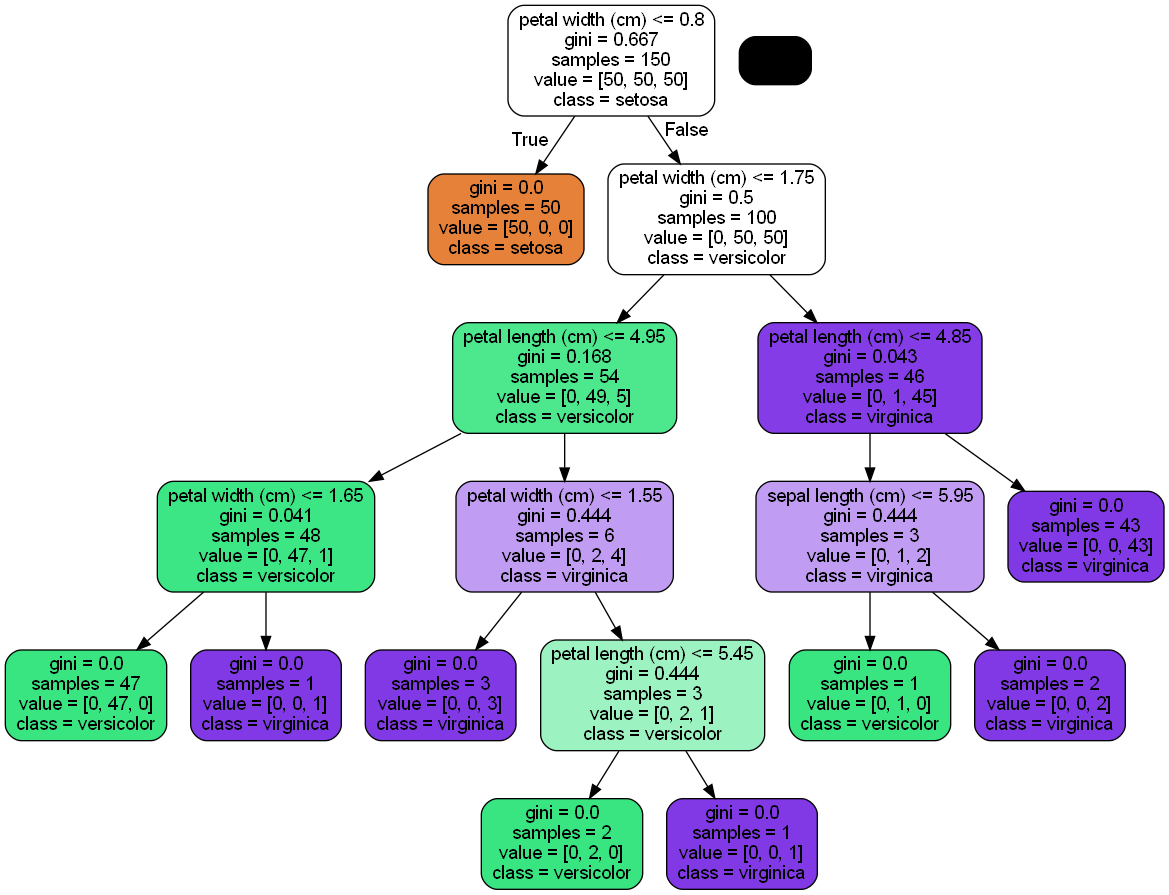

In [13]:
Image(graph_iris.create_png())

In [14]:
graph_iris.write_pdf("iris_dataset_tree.pdf")

True

# 'OR' TREE USING PYTHON LIBRARIES

In [15]:
#input and output for OR 
Input=[[0,0],[0,1],[1,0],[1,1]]
Output=[0,1,1,1]

In [16]:
alg_clf=DecisionTreeClassifier()
alg_clf.fit(Input,Output)

DecisionTreeClassifier()

In [17]:
dot_data1=export_graphviz(alg_clf, out_file=None,filled=True, rounded=True)
graph_or=pdp.graph_from_dot_data(dot_data1)

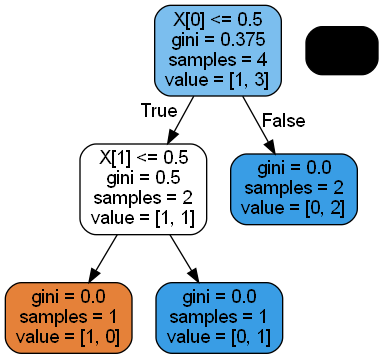

In [18]:
Image(graph_or.create_png())

In [19]:
graph_or.write_pdf("or_tree.pdf")

True